<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.001457  42.068164  86.744186  ...  227.543916  226.775690  0.768226
      1.0    32.468207  68.509050  88.230753  ...  200.840387  199.261760  1.578627
      2.0    92.914756  38.108065  38.471231  ...  179.445530  179.340335  0.105195
      3.0    71.190212  40.379026  64.371622  ...  185.925167  185.874362  0.050805
      4.0    55.436400  34.440822  94.547367  ...  194.300198  194.442093 -0.141895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  97.049733  57.722371  33.992889  ...  199.295276  198.652656  0.642620
      246.0  82.849004  31.140243  35.791249  ...  158.769387  159.709181 -0.939794
      247.0  40.297513  42.231566  99.136035  ...  193.112415  191.700484  1.411931
      248.0  54.861676  45.725690  48.847697  ...  158.903206  159.428339 -0.525133
      249.0  49.401116  90.356966  86.295970  ...  235.404058  236.053510 -0.649452

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.001457  42.068164  86.744186  ...  227.543916  226.775690  0.768226
      1.0    32.468207  68.509050  88.230753  ...  200.840387  199.261760  1.578627
      2.0    92.914756  38.108065  38.471231  ...  179.445530  179.340335  0.105195
      3.0    71.190212  40.379026  64.371622  ...  185.925167  185.874362  0.050805
      4.0    55.436400  34.440822  94.547367  ...  194.300198  194.442093 -0.141895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  97.049733  57.722371  33.992889  ...  199.295276  198.652656  0.642620
      246.0  82.849004  31.140243  35.791249  ...  158.769387  159.709181 -0.939794
      247.0  40.297513  42.231566  99.136035  ...  193.112415  191.700484  1.411931
      248.0  54.861676  45.725690  48.847697  ...  158.903206  159.428339 -0.525133
      249.0  49.401116  90.356966  86.295970  ...  235.404058  236.053510 -0.649452

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.001457,42.068164,86.744186,0.730108,227.543916,226.775690,0.768226
1,0.0,1.0,32.468207,68.509050,88.230753,1.632376,200.840387,199.261760,1.578627
2,0.0,2.0,92.914756,38.108065,38.471231,-0.048523,179.445530,179.340335,0.105195
3,0.0,3.0,71.190212,40.379026,64.371622,-0.015694,185.925167,185.874362,0.050805
4,0.0,4.0,55.436400,34.440822,94.547367,-0.124391,194.300198,194.442093,-0.141895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.049733,57.722371,33.992889,0.530284,199.295276,198.652656,0.642620
249996,999.0,246.0,82.849004,31.140243,35.791249,-1.011109,158.769387,159.709181,-0.939794
249997,999.0,247.0,40.297513,42.231566,99.136035,1.447301,193.112415,191.700484,1.411931
249998,999.0,248.0,54.861676,45.725690,48.847697,-0.531857,158.903206,159.428339,-0.525133


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.001457  42.068164  86.744186  ...  227.543916  226.775690  0.768226
      1.0    32.468207  68.509050  88.230753  ...  200.840387  199.261760  1.578627
      2.0    92.914756  38.108065  38.471231  ...  179.445530  179.340335  0.105195
      3.0    71.190212  40.379026  64.371622  ...  185.925167  185.874362  0.050805
      4.0    55.436400  34.440822  94.547367  ...  194.300198  194.442093 -0.141895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  97.049733  57.722371  33.992889  ...  199.295276  198.652656  0.642620
      246.0  82.849004  31.140243  35.791249  ...  158.769387  159.709181 -0.939794
      247.0  40.297513  42.231566  99.136035  ...  193.112415  191.700484  1.411931
      248.0  54.861676  45.725690  48.847697  ...  158.903206  159.428339 -0.525133
      249.0  49.401116  90.356966  86.295970  ...  235.404058  236.053510 -0.649452

[250000 rows x 7 columns]

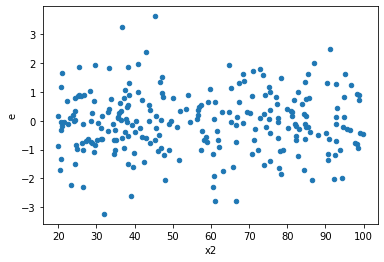

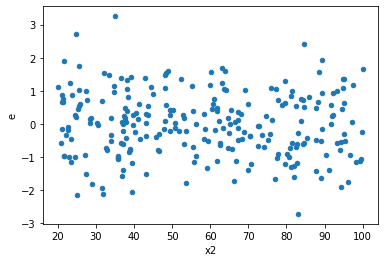

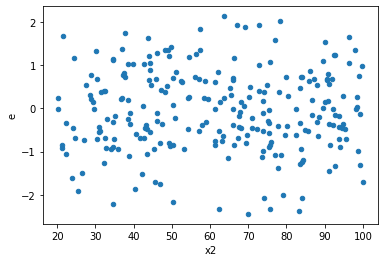

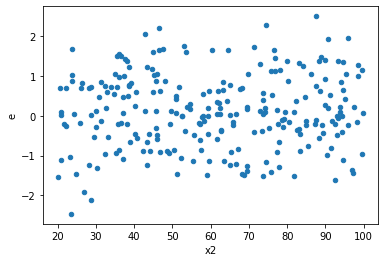

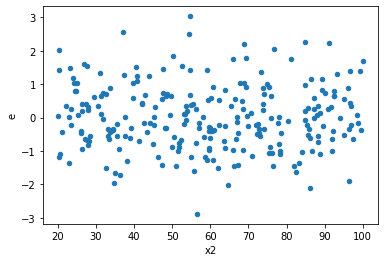

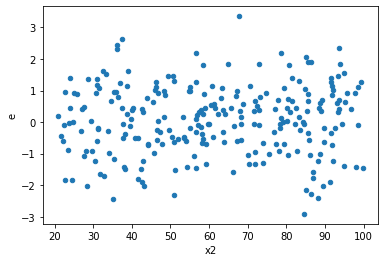

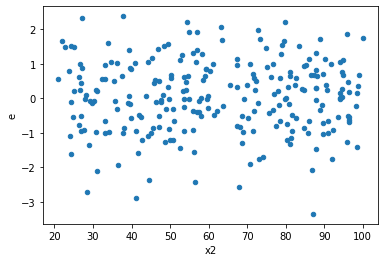

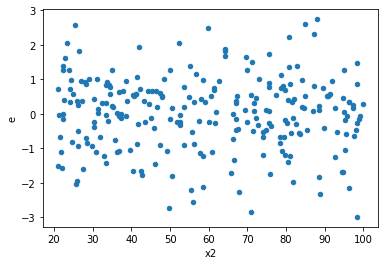

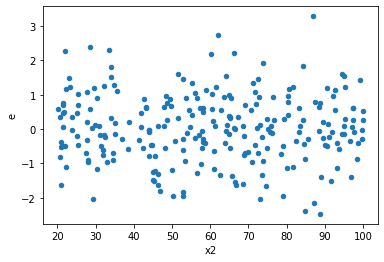

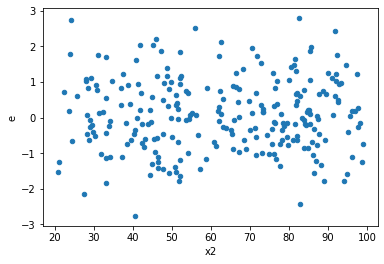

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
2.0,128.0,116.0,105.61867047684449,109.8383031433294,0.8316430746208228,0.9551156795072121,1.1475327769221808,0.44662359821346653,0.7766882008932667,Reject001=1 : Homoscedasticity
3.0,116.0,128.0,90.41077603085128,112.09401001540128,0.7861806611378372,0.8826300001212699,1.123596113607,0.5236567281281719,0.7381716359359141,Reject001=1 : Homoscedasticity
5.0,129.0,115.0,152.59733249304097,138.87545828914807,1.1921666601018825,1.2182057744662111,1.0208699803261971,0.9067450795962215,0.5466274602018892,Reject001=1 : Homoscedasticity
7.0,119.0,125.0,121.64764744645532,151.21733980734678,1.030912266495384,1.2194946758656997,1.183408890500405,0.35488289357304814,0.8225585532134759,Reject001=1 : Homoscedasticity
8.0,121.0,123.0,101.98259858929438,130.16812644336468,0.8498549882441199,1.0669518560931532,1.2556217758044925,0.21046561479875292,0.8947671926006235,Reject001=1 : Homoscedasticity
9.0,135.0,109.0,138.70329629361146,113.40408734740151,1.0350992260717273,1.0500378458092732,1.0126262846564718,0.9400162391869888,0.5299918804065056,Reject001=1 : Homoscedasticity
11.0,117.0,127.0,108.23181130911618,129.02686981022333,0.9330328561130705,1.0240227762716136,1.0982655868401074,0.607772322998785,0.6961138385006075,Reject001=1 : Homoscedasticity
13.0,141.0,103.0,128.71665146581668,117.19231239593375,0.9194046533272621,1.1489442391758211,1.246367966514054,0.22468428250698502,0.8876578587465075,Reject001=1 : Homoscedasticity
15.0,123.0,121.0,118.94658021649059,144.57674418194614,0.9749719689876277,1.2048062015162178,1.235566774306574,0.2438045281936374,0.8780977359031813,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,120.0,143.1037895566491,135.23383083260575,1.1634454435499928,1.1364187464924853,0.9765054134948288,0.8965550480671007,Reject001=1 : Homoscedasticity
1.0,122.0,122.0,118.23412663022502,111.2352059068394,0.9771415423985539,0.9192992223705735,0.9408045635988448,0.7366617896114118,Reject001=1 : Homoscedasticity
2.0,128.0,116.0,105.61867047684449,109.8383031433294,0.8316430746208228,0.9551156795072121,1.1475327769221808,0.44662359821346653,Reject001=1 : Homoscedasticity
3.0,116.0,128.0,90.41077603085128,112.09401001540128,0.7861806611378372,0.8826300001212699,1.123596113607,1.4763432718718281,Reject001=1 : Homoscedasticity
4.0,127.0,117.0,128.1056990220546,96.36947876425117,1.0167118970004334,0.8307713686573377,0.8165615358995882,0.26657157810425125,Reject001=1 : Homoscedasticity
5.0,129.0,115.0,152.59733249304097,138.87545828914807,1.1921666601018825,1.2182057744662111,1.0208699803261971,1.0932549204037785,Reject001=1 : Homoscedasticity
6.0,118.0,126.0,128.9293792415108,130.88952947984615,1.101960506337699,1.0471162358387691,0.9507459345945507,0.7792740090607363,Reject001=1 : Homoscedasticity
7.0,119.0,125.0,121.64764744645532,151.21733980734678,1.030912266495384,1.2194946758656997,1.183408890500405,0.35488289357304814,Reject001=1 : Homoscedasticity
8.0,121.0,123.0,101.98259858929438,130.16812644336468,0.8498549882441199,1.0669518560931532,1.2556217758044925,0.21046561479875292,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      992
Reject001=0 : Heteroscedasticity      8
Name: Result_test, dtype: int64